In [1]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### CATBOOST

In [2]:
df_train = pd.read_csv('../data/train_con_features.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('../data/test_con_features.csv', index_col='Unnamed: 0')
display(df_train.head())

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,estado_descripcion,seguridad_titulo,moderno_titulo,hermoso_titulo,estado_titulo,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15
0,254099,depto tipo a 402,depto interior de 80 15m2 consta de sala com...,Apartamento,avenida division del norte 2005,Benito Juárez,Distrito Federal,8.116114,2.0,1.0,...,0,0,0,0,0,0,0.000000,1,0,0
1,53461,condominio horizontal en venta,p entre sonora y guerrero atr aacute s del h...,Casa en condominio,av mexico,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,...,1,0,0,0,0,1,0.007968,1,0,0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion la mejor ubicacion residencial en...,Casa,urbi tonala,Tonalá,Jalisco,5.000000,3.0,2.0,...,4,0,0,0,0,10,0.046957,0,0,0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,ignacio manuel altamirano 128,Zinacantepec,Edo. de México,1.000000,2.0,1.0,...,0,0,0,0,0,0,0.000000,0,0,0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,paseos del sol,Zapopan,Jalisco,10.000000,2.0,1.0,...,1,0,0,0,0,1,0.074108,0,0,0


In [28]:
lst_propiedades = ['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 
                   'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 
                   'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
                   'metros_por_bano', 'metros_por_amenities', 'es_avenida']

lst_tipos_propiedades = ['es_Apartamento', 'es_Casa']

lst_cantidad_palabras = ['seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 
                         'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo',
                         'relacion_palabras_descripcion', 'cantidad_palabras_descripcion']

lst_ciudades = ['provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15']

columnas_numericas = lst_propiedades + lst_tipos_propiedades + lst_cantidad_palabras
columnas_numericas_y_precio = lst_propiedades + lst_tipos_propiedades + lst_cantidad_palabras
columnas_numericas_y_precio.append('precio')

In [29]:
X = df_train[columnas_numericas_y_precio].drop(columns=['precio']).values
y = df_train['precio'].values

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(156000, 30) (156000,)
(84000, 30) (84000,)


In [31]:
from catboost import CatBoostRegressor
CatBoost = CatBoostRegressor(iterations=1000, depth=5, learning_rate=0.05, loss_function='MAE')

In [32]:
CatBoost_fit = CatBoost.fit(X_train, y_train)

0:	learn: 1478059.1815366	total: 57.2ms	remaining: 57.2s
1:	learn: 1443212.9196845	total: 111ms	remaining: 55.6s
2:	learn: 1410796.2604577	total: 166ms	remaining: 55.1s
3:	learn: 1378295.2600369	total: 223ms	remaining: 55.6s
4:	learn: 1349994.0211571	total: 282ms	remaining: 56s
5:	learn: 1323143.4645371	total: 351ms	remaining: 58.2s
6:	learn: 1296734.5664820	total: 412ms	remaining: 58.5s
7:	learn: 1271089.9307288	total: 473ms	remaining: 58.6s
8:	learn: 1247610.5240280	total: 551ms	remaining: 1m
9:	learn: 1226924.1429499	total: 615ms	remaining: 1m
10:	learn: 1206801.8800021	total: 678ms	remaining: 1m
11:	learn: 1188143.6193478	total: 751ms	remaining: 1m 1s
12:	learn: 1170655.8180821	total: 813ms	remaining: 1m 1s
13:	learn: 1154020.1984538	total: 876ms	remaining: 1m 1s
14:	learn: 1138466.0397066	total: 946ms	remaining: 1m 2s
15:	learn: 1125394.6147086	total: 1.01s	remaining: 1m 2s
16:	learn: 1112858.2852106	total: 1.07s	remaining: 1m 1s
17:	learn: 1101053.1692642	total: 1.14s	remaining: 

In [35]:
CatBoost_pred = CatBoost_fit.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error

CatBoost_mae = mean_absolute_error(y_test, CatBoost_pred)
CatBoost_mae_train = mean_absolute_error(y_train, CatBoost_fit.predict(X_train))
print(f"MAE CATBoost (train): {CatBoost_mae_train:.5f}")
print(f"MAE CATBoost: {CatBoost_mae:.5f}")
print("------------------------------")

MAE CATBoost (train): 817022.64496
MAE CATBoost: 826304.61415
------------------------------


In [33]:
CatBoost_fit.feature_importances_

array([3.78620794e+00, 3.49809056e+00, 5.05742262e+00, 7.03135868e+00,
       3.47743563e+01, 6.67046511e+00, 5.90105053e-01, 3.22962780e-01,
       3.25626254e-01, 1.15397543e-01, 3.23861887e-01, 2.58634796e-01,
       1.96571905e-01, 2.17187517e+00, 8.56534414e+00, 3.21635744e+00,
       2.14678722e-01, 9.91616532e-02, 1.82160291e+01, 3.29211220e+00,
       6.92166894e-02, 9.76651161e-02, 1.85927634e-01, 4.30770145e-02,
       1.71190537e-02, 1.06958792e-02, 1.24342448e-01, 1.63183237e-02,
       6.00250560e-01, 1.08767428e-01])

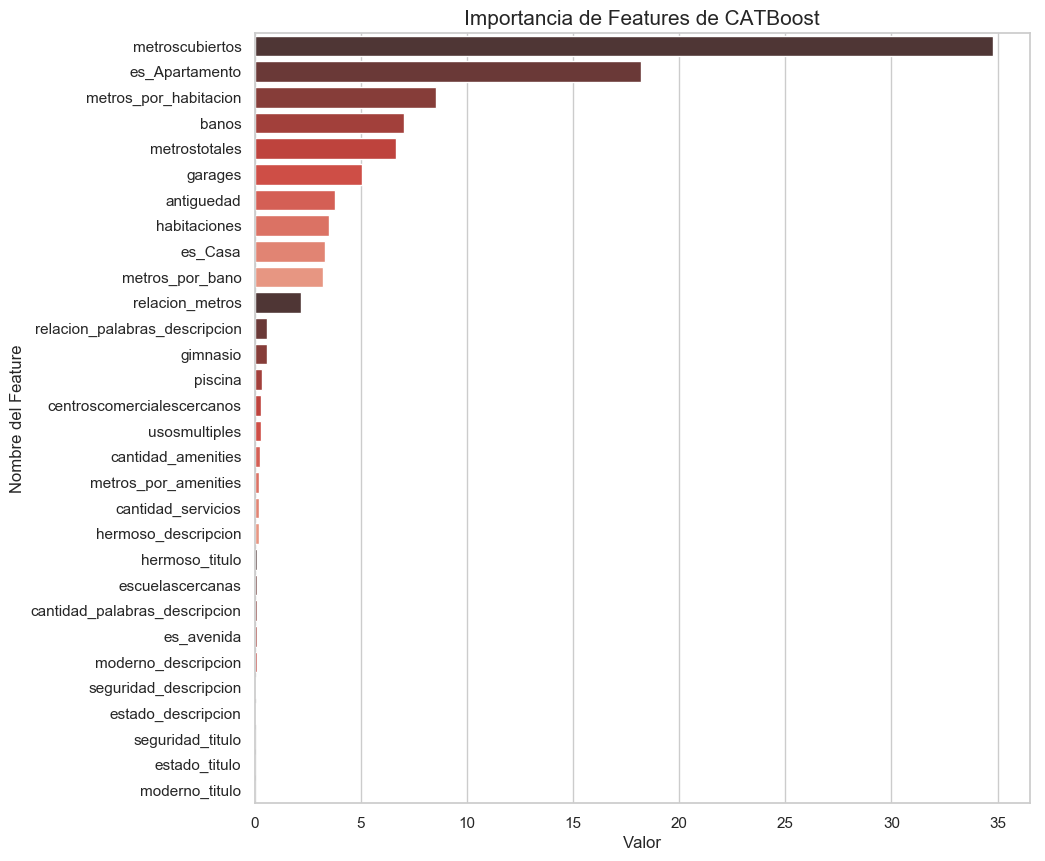

In [34]:
features = pd.DataFrame(index=columnas_numericas)
features['imp'] = CatBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)
features

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de CATBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

In [37]:
df_train_sumbit = df_train[columnas_numericas_y_precio]
df_test_submit = df_test[columnas_numericas]
CatBoost_pred_sumbit = CatBoostRegressor(iterations=1000, depth=5, learning_rate=0.05, loss_function='MAE')\
                        .fit(df_train_sumbit[columnas_numericas], df_train_sumbit['precio'])\
                        .predict(df_test_submit[columnas_numericas])

0:	learn: 1480398.9382497	total: 107ms	remaining: 1m 46s
1:	learn: 1444693.0144335	total: 207ms	remaining: 1m 43s
2:	learn: 1411539.5826533	total: 314ms	remaining: 1m 44s
3:	learn: 1380844.5118157	total: 438ms	remaining: 1m 48s
4:	learn: 1350152.7758228	total: 553ms	remaining: 1m 50s
5:	learn: 1324448.1194943	total: 649ms	remaining: 1m 47s
6:	learn: 1298201.7424046	total: 757ms	remaining: 1m 47s
7:	learn: 1274311.5767983	total: 859ms	remaining: 1m 46s
8:	learn: 1250957.6805801	total: 969ms	remaining: 1m 46s
9:	learn: 1228855.1612455	total: 1.08s	remaining: 1m 46s
10:	learn: 1208539.9377258	total: 1.19s	remaining: 1m 46s
11:	learn: 1189478.7843729	total: 1.3s	remaining: 1m 46s
12:	learn: 1171925.1969144	total: 1.42s	remaining: 1m 47s
13:	learn: 1155042.0470956	total: 1.52s	remaining: 1m 47s
14:	learn: 1140448.3181844	total: 1.64s	remaining: 1m 47s
15:	learn: 1126619.5152484	total: 1.74s	remaining: 1m 47s
16:	learn: 1114138.1712946	total: 1.84s	remaining: 1m 46s
17:	learn: 1101287.243668

In [38]:
resultado_submit = pd.DataFrame(index=df_test.index)
resultado_submit['id'] = df_test['id']
resultado_submit['target'] = CatBoost_pred_sumbit
display(resultado_submit.head())
resultado_submit.to_csv('../data/sumbitCATBoost.csv',index=False)

,id,target
0,4941,4.775521e+06
1,51775,1.940713e+06
2,115253,2.157428e+06
3,299321,2.399547e+06
4,173570,5.593747e+05


#### Score en Kaggle (features => score):

 **1.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion', 'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'es_Apartamento', 'es_Casa', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'esstado_titulo','relacion_palabras_descripcion', 'cantidad_palabras_descripcion','provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15']=>* ***824756.87687*** con iterations=1000, depth=5, learning_rate=0.05, loss_function='MAE'
